In [47]:
import pandas as pd
import scipy.stats as stats
import numpy as np


In [48]:
df = pd.read_excel("/home/t-daggarwal/MEGA_V3/MultilingualBlanketEval/MEGANotebooks/MEGA_list_of_languages 3.xlsx")

In [49]:
df

,Dataset,Task,Language,Language Tier,Language Code,Language Class,Language Script,DV003 Monolingual,DV003 TranslateTest,DV003 Zero-Shot Cross Lingual,...,Bing Translator,Google Translator,Systran,Mistral-7B-Instruct-v0.1,GPT4-V Monolingual,GPT4-V Translate-Test,Mistral-7B-v0.1,Metrics_x,Direction,Metrics
0,AfriQA,Question Answering,Bemba,NaN,bem,0.0,Latin,NaN,NaN,NaN,...,NaN,NaN,NaN,0.019032,NaN,NaN,0.016606,F1 Score,HigherBetter,F1 Score
1,AfriQA,Question Answering,Fon,NaN,fon,0.0,Latin,NaN,NaN,NaN,...,NaN,NaN,NaN,0.056181,NaN,NaN,0.000000,F1 Score,HigherBetter,F1 Score
2,AfriQA,Question Answering,Hausa,NaN,ha,2.0,Latin,NaN,NaN,NaN,...,NaN,NaN,NaN,0.004167,NaN,NaN,0.016786,F1 Score,HigherBetter,F1 Score
3,AfriQA,Question Answering,Igbo,NaN,ig,1.0,Latin,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000611,NaN,NaN,0.013768,F1 Score,HigherBetter,F1 Score
4,AfriQA,Question Answering,Kinyarwanda,NaN,rw,0.0,Latin,NaN,NaN,NaN,...,NaN,NaN,NaN,0.018608,NaN,NaN,0.018718,F1 Score,HigherBetter,F1 Score
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,XstoryCloze,Commonsense Reasoning,Burmese,NaN,my,1.0,Brahmic,0.473858,0.901390,0.580410,...,NaN,NaN,NaN,0.000662,NaN,NaN,NaN,Accuracy,HigherBetter,Accuracy
358,XstoryCloze,Commonsense Reasoning,Russian,2.0,ru,4.0,Cyrillic,0.941760,0.968895,0.949702,...,NaN,NaN,NaN,0.008604,NaN,NaN,NaN,Accuracy,HigherBetter,Accuracy
359,XstoryCloze,Commonsense Reasoning,Swahili,NaN,sw,2.0,Latin,0.780940,0.906684,0.775645,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,Accuracy,HigherBetter,Accuracy
360,XstoryCloze,Commonsense Reasoning,Telugu,NaN,te,1.0,Brahmic,0.576439,0.943084,0.630046,...,NaN,NaN,NaN,0.411950,NaN,NaN,0.175381,Accuracy,HigherBetter,Accuracy


In [50]:
exclude_words =['translatetest', 'cross lingual', 'translate-test']

# monolingual_columns = [column for column in df.columns if not any(word.lower() in column.lower() for word in exclude_words)]

# monolingual_columns

In [52]:
new_df = df[df['Dataset'] == "XNLI"]

# Assuming new_df is your DataFrame
non_nan_columns = new_df.columns[new_df.notna().all()].tolist()

non_nan_monolingual_columns = [column for column in non_nan_columns if not any(word.lower() in column.lower() for word in exclude_words)]

print(non_nan_monolingual_columns)

new_df = new_df[non_nan_monolingual_columns]


new_df = new_df.iloc[:, 6:-3]

new_df

['Dataset', 'Task', 'Language', 'Language Code', 'Language Class', 'Language Script', 'DV003 Monolingual', 'GPT-3.5-Turbo Monolingual', 'GPT-4 Monolingual', 'TULRv6', 'BLOOMZ', 'XLM-R', 'mBERT', 'XGLM', 'mT5', 'Llama2-7B Monolingual', 'Llama2-13B Monolingual', 'Llama2-70B Monolingual', 'Mistral-7B-Instruct-v0.1', 'Mistral-7B-v0.1', 'Metrics_x', 'Direction', 'Metrics']


,DV003 Monolingual,GPT-3.5-Turbo Monolingual,GPT-4 Monolingual,TULRv6,BLOOMZ,XLM-R,mBERT,XGLM,mT5,Llama2-7B Monolingual,Llama2-13B Monolingual,Llama2-70B Monolingual,Mistral-7B-Instruct-v0.1,Mistral-7B-v0.1
318,0.522156,0.589820,0.731138,0.8898,0.606827,0.772,0.643,0.464,0.733,0.39,0.370,0.3500,0.349140,0.385542
319,0.618164,0.635130,0.772655,0.9057,0.465462,0.830,0.680,0.489,0.786,0.45,0.510,0.5500,0.402794,0.417936
320,0.657884,0.673253,0.788024,0.8998,0.540161,0.825,0.700,0.456,0.774,0.45,0.500,0.5800,0.384750,0.416392
321,0.597006,0.650898,0.790419,0.9019,0.474297,0.808,0.653,0.487,0.771,0.39,0.000,0.4130,0.351497,0.380676
322,0.795210,0.762475,0.849102,0.9325,0.674699,0.887,0.808,0.526,0.847,0.56,0.550,0.6330,0.433932,0.410678
323,0.709980,0.703194,0.788000,0.9113,0.612450,0.837,0.735,0.458,0.803,0.50,0.510,0.5500,0.406986,0.446906
324,0.656886,0.677046,0.794600,0.9071,0.613655,0.822,0.734,0.494,0.791,0.50,0.520,0.5500,0.413539,0.490885
325,0.476248,0.554890,0.719960,0.8618,0.568273,0.756,0.589,0.468,0.708,0.37,0.000,0.3110,0.345977,0.409281
326,0.622156,0.624950,0.743114,0.8922,0.533333,0.791,0.678,0.486,0.771,0.48,0.500,0.5450,0.429547,0.400399
327,0.502196,0.563074,0.708982,0.8546,0.503614,0.712,0.497,0.445,0.694,0.33,0.360,0.3910,0.335130,0.337469


In [53]:
# agg_corr_matrix

In [56]:
spearman_corr_matrix = new_df.corr(method='spearman')

print(spearman_corr_matrix)

                           DV003 Monolingual  GPT-3.5-Turbo Monolingual  \
DV003 Monolingual                   1.000000                   0.946429   
GPT-3.5-Turbo Monolingual           0.946429                   1.000000   
GPT-4 Monolingual                   0.885714                   0.967857   
TULRv6                              0.919501                   0.928445   
BLOOMZ                              0.407143                   0.417857   
XLM-R                               0.925000                   0.907143   
mBERT                               0.891868                   0.866846   
XGLM                                0.496429                   0.492857   
mT5                                 0.940125                   0.906167   
Llama2-7B Monolingual               0.908451                   0.852795   
Llama2-13B Monolingual              0.840987                   0.778093   
Llama2-70B Monolingual              0.903232                   0.835131   
Mistral-7B-Instruct-v0.1 

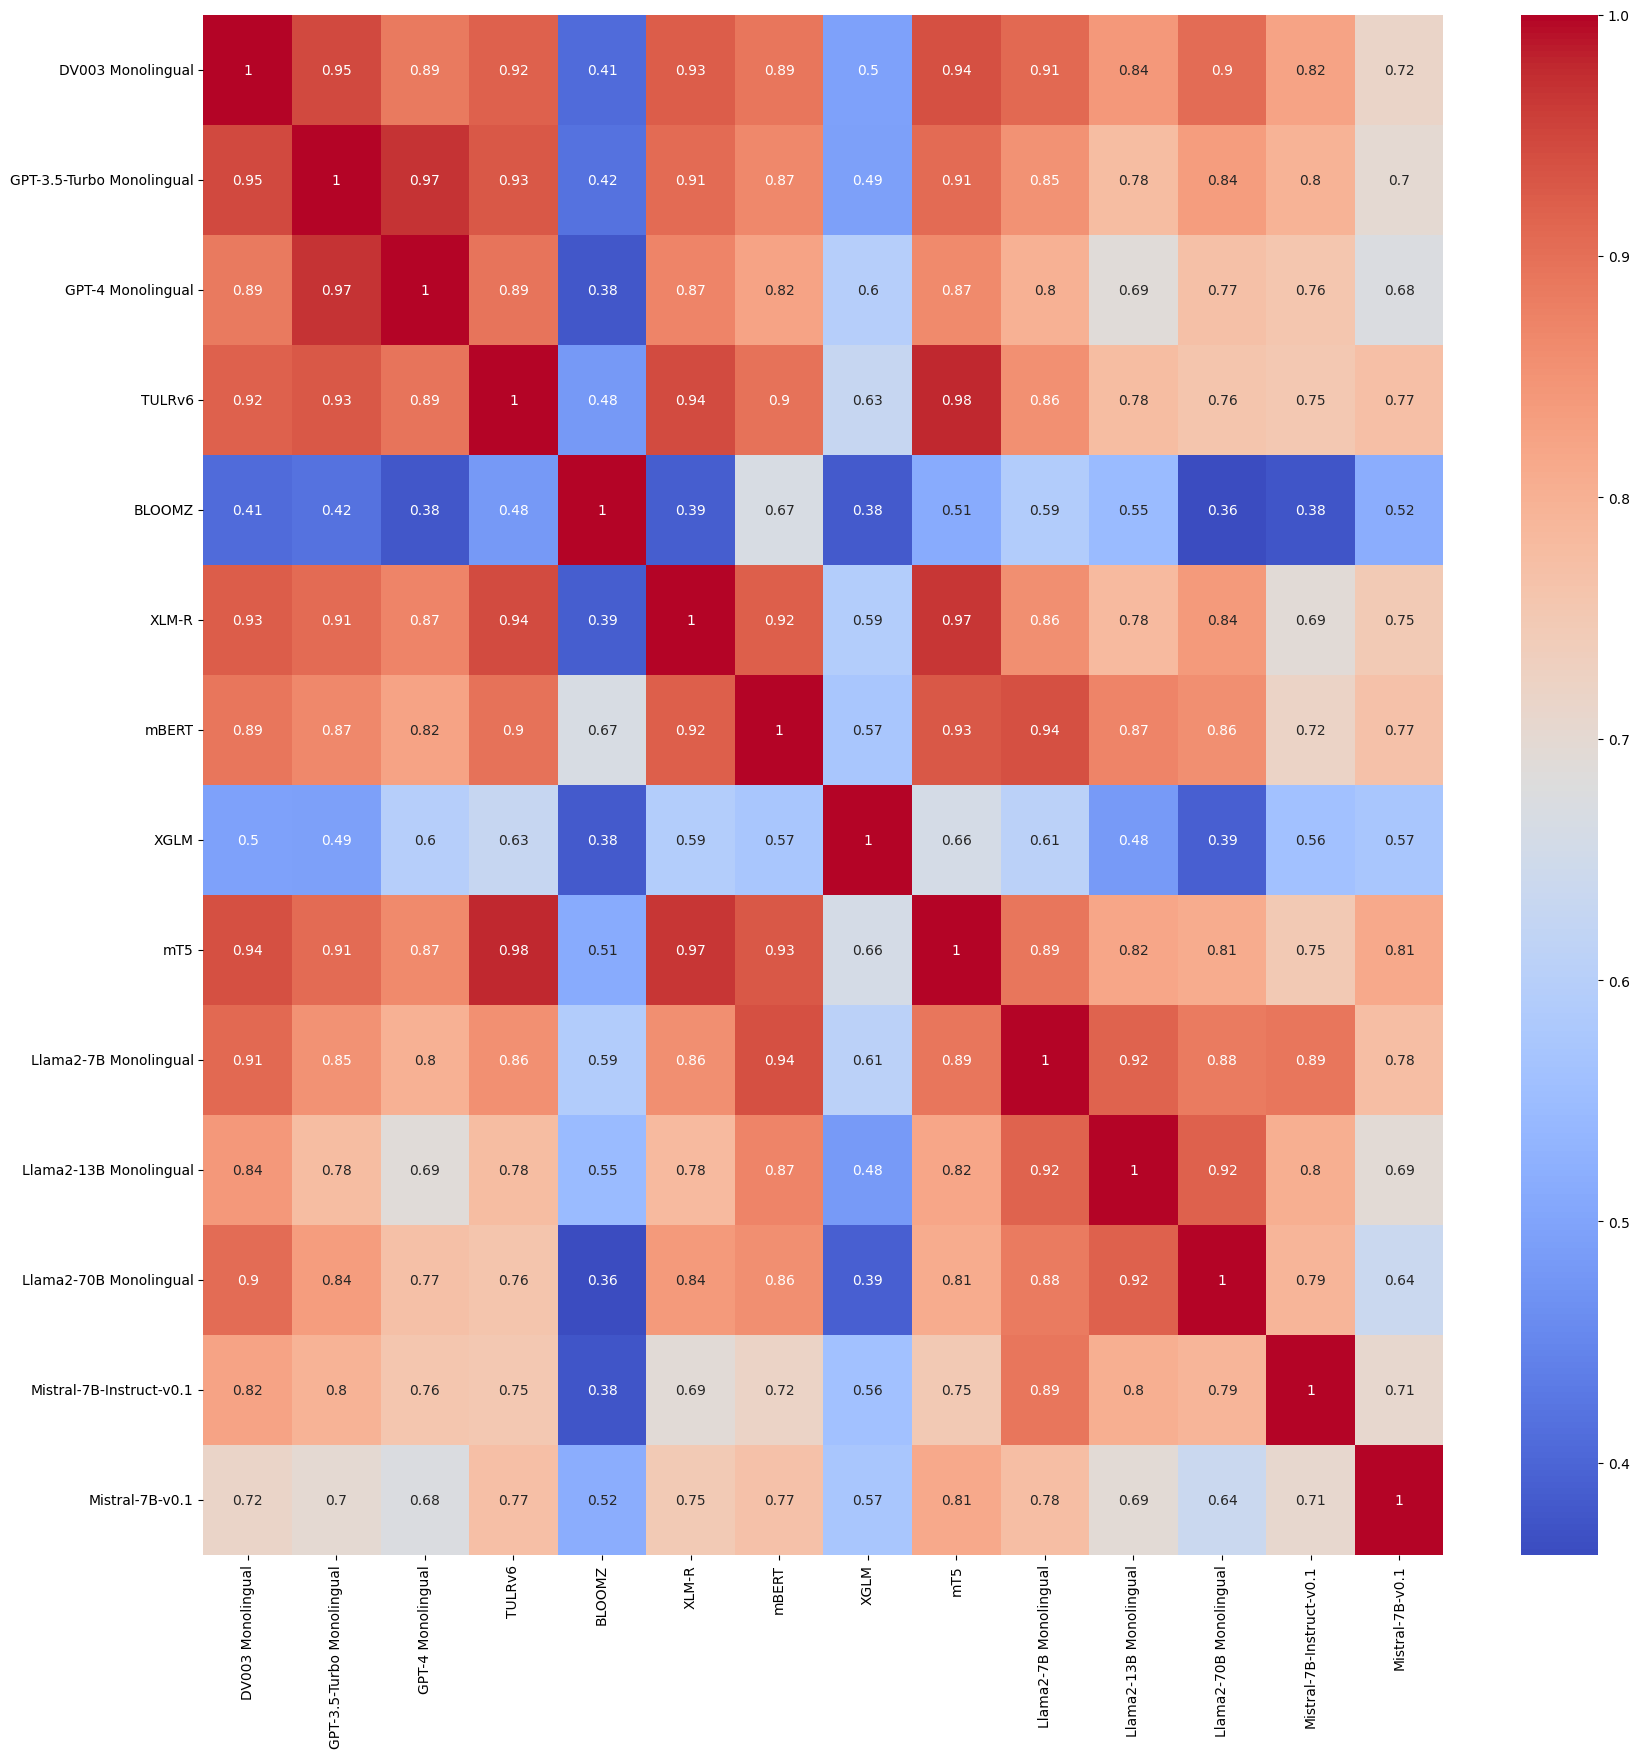

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 20))


# Assuming spearman_corr_matrix is your correlation matrix
sns.heatmap(spearman_corr_matrix, annot=True, cmap='coolwarm')

plt.show()

In [62]:
new_df = df[df['Dataset'] == "XQuAD"]

# Assuming new_df is your DataFrame
non_nan_columns = new_df.columns[new_df.notna().all()].tolist()

non_nan_monolingual_columns = [column for column in non_nan_columns if not any(word.lower() in column.lower() for word in exclude_words)]

print(non_nan_monolingual_columns)

new_df = new_df[non_nan_monolingual_columns]


new_df = new_df.iloc[:, 6:-3]

spearman_corr_matrix = new_df.corr(method='spearman')


['Dataset', 'Task', 'Language', 'Language Code', 'Language Class', 'Language Script', 'BLOOMZ', 'PaLM2 Monolingual', 'Llama2-7B Monolingual', 'Llama2-13B Monolingual', 'Llama2-70B Monolingual', 'Mistral-7B-Instruct-v0.1', 'Mistral-7B-v0.1', 'Metrics_x', 'Direction', 'Metrics']


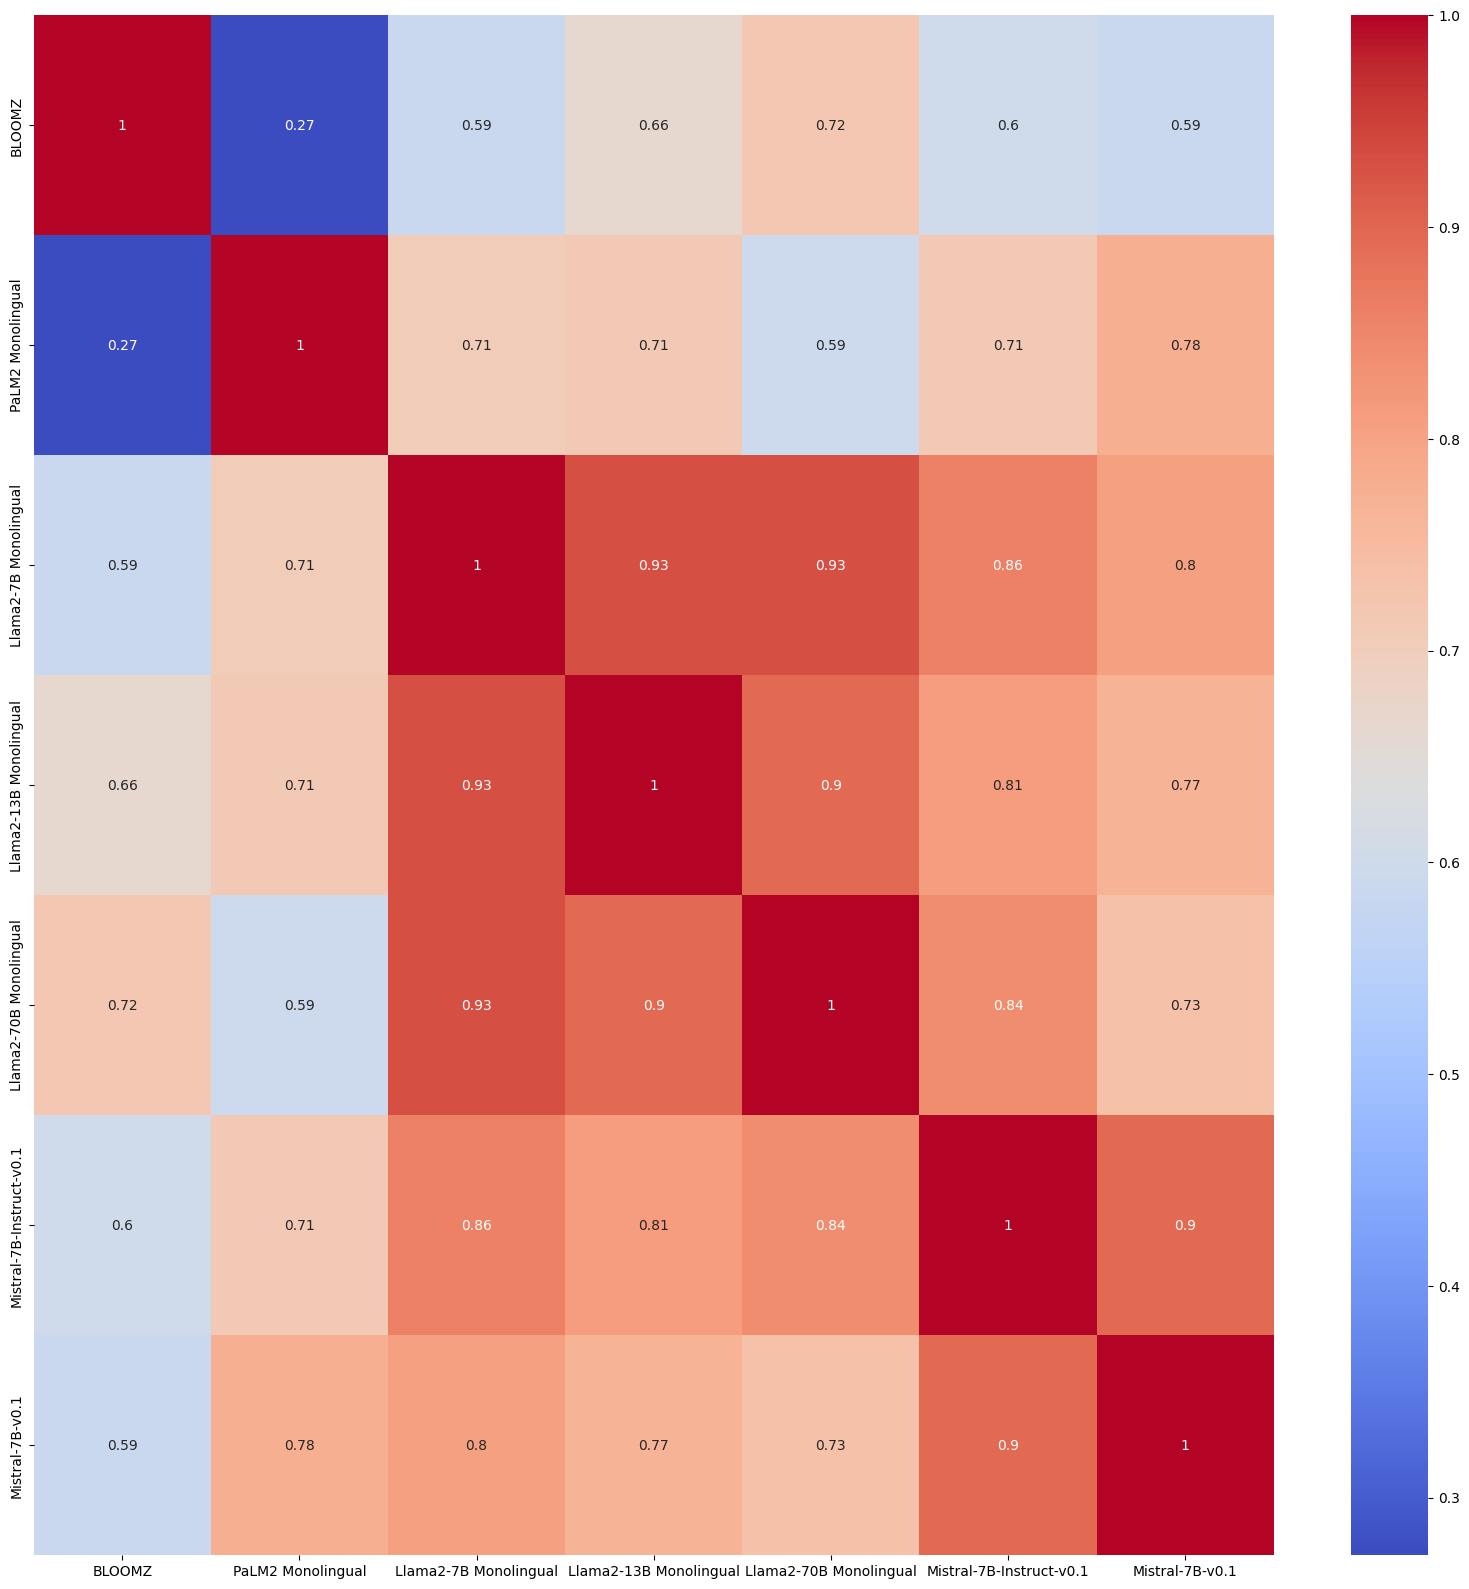

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 20))


# Assuming spearman_corr_matrix is your correlation matrix
sns.heatmap(spearman_corr_matrix, annot=True, cmap='coolwarm')

plt.show()

In [65]:
df['Dataset'].unique()

array(['AfriQA', 'Belebele', 'GLUECoS-NLI', 'GLUECoS-SA',
       'IN22_conv_en_indic', 'IN22_conv_indic_en', 'IN22_gen_indic_en',
       'IN22_gen_en_indic', 'IndicQA', 'IndicXNLI', 'Jigsaw', 'MARVL',
       'MLQA', 'PAN-X', 'PAWS-X', 'TyDiQA-GoldP', 'UDPOS', 'WinoMT',
       'XCOPA', 'XLSum', 'XM3600', 'XNLI', 'XQuAD', 'X-RiSAWOZ',
       'XstoryCloze'], dtype=object)

['Dataset', 'Task', 'Language', 'Language Code', 'Language Class', 'Language Script', 'DV003 Monolingual', 'GPT-3.5-Turbo Monolingual', 'GPT-4 Monolingual', 'BLOOMZ', 'XGLM', 'Metrics_x', 'Direction', 'Metrics']


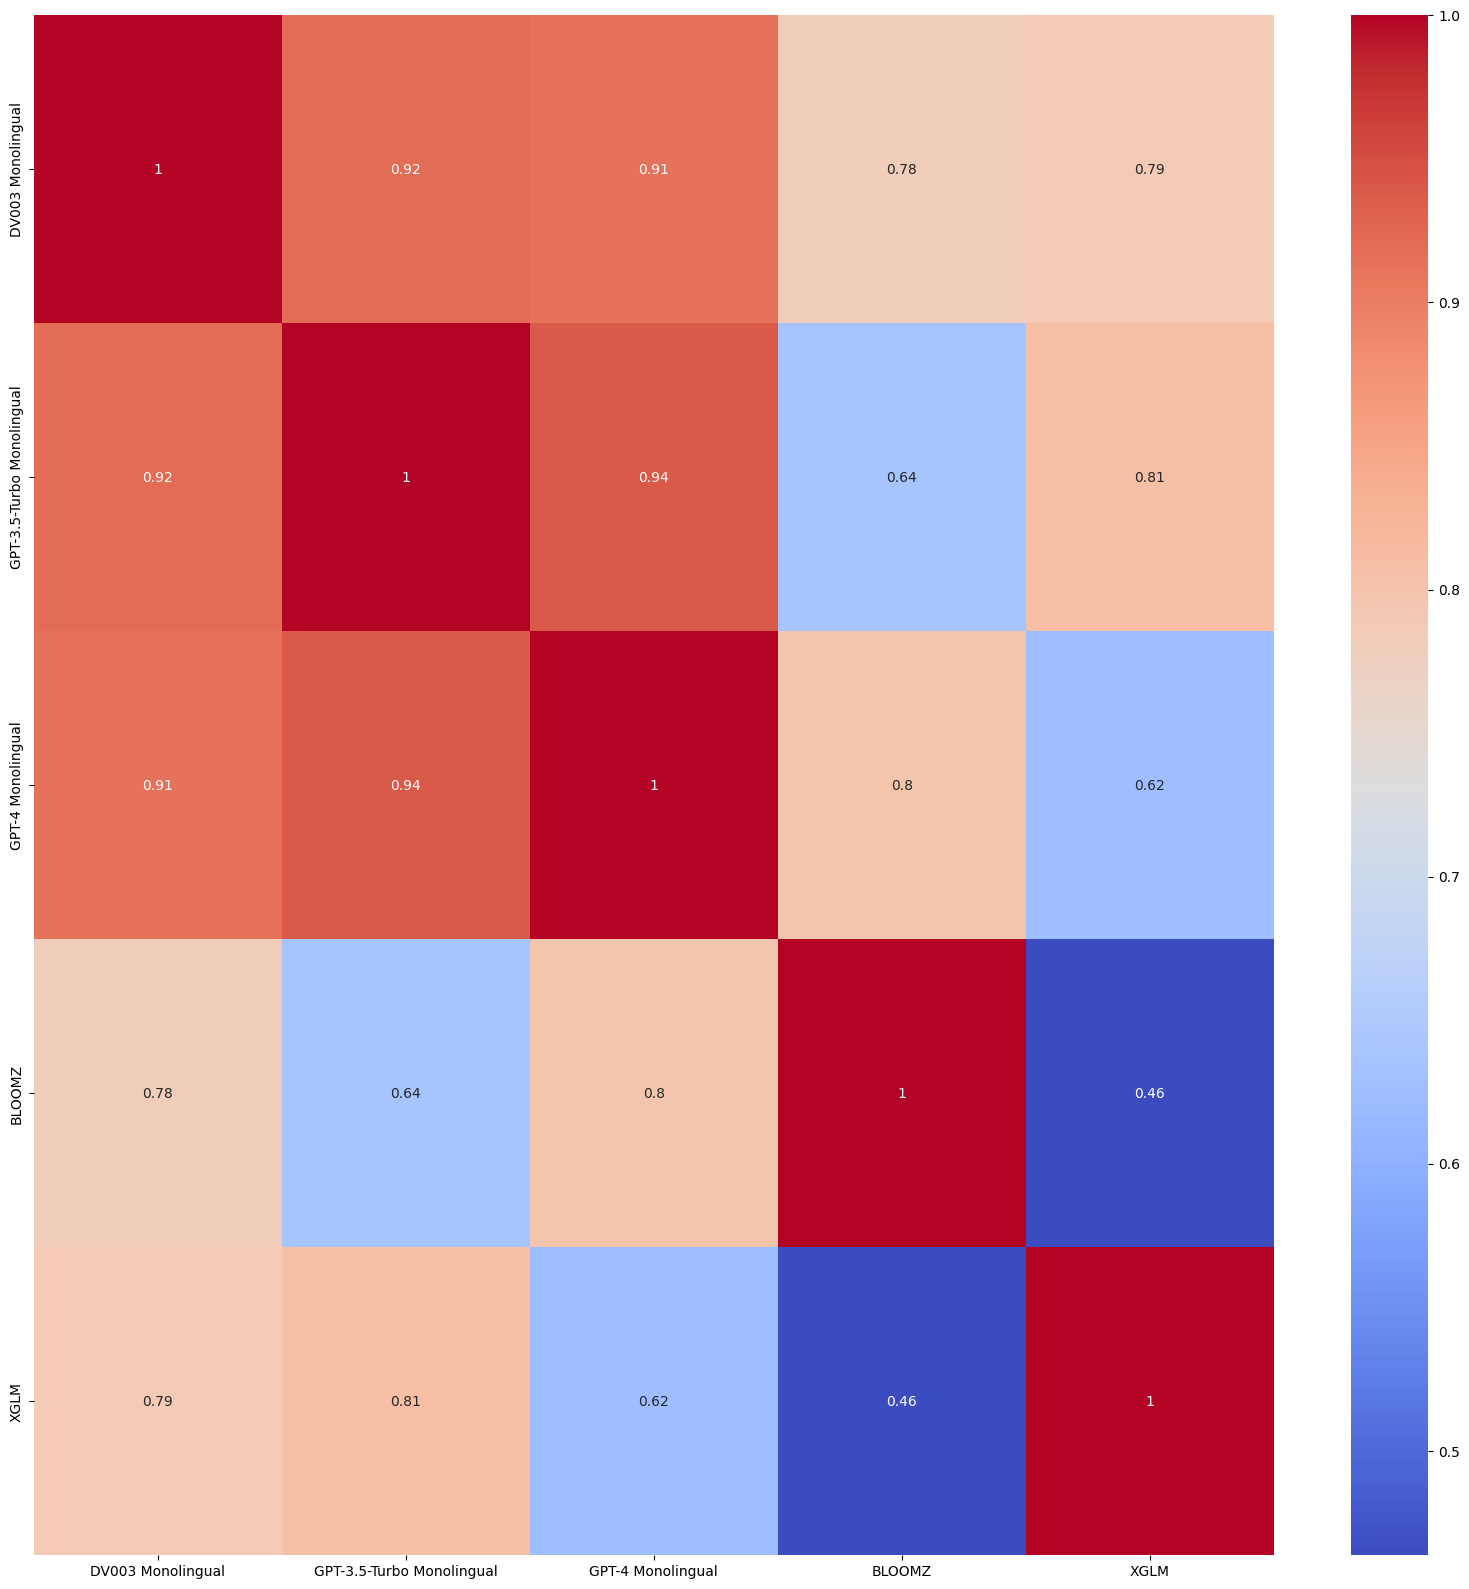

Bad pipe message: %s [b'\x9c\r}K.EH\xb0\xfa\xe6b\xb7\xb6\xa0\xf0ca\xf9 \xd8\xe7\xb0+k\xbd\x92M\xe1\xbe\xe6j\xa1\xaf\x8e\x07\t\x0b\x8ex\xb9Toq\xa5NX\x16N*Xn\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08\x0b\x08\x04\x08\x05\x08\x06\x04\x01\x05\x01\x06\x01\x00+\x00\x03\x02\x03\x04\x00-\x00\x02\x01\x01\x003\x00&\x00$\x00\x1d\x00 \x03\xf3\xde\xd6\xd2\x00\xf7\x19\x86\x03\xacz\xa9z\x93l']
Bad pipe message: %s [b'\x94l\xdb\xc6 \xbb\xb2\x92p\x97<\xc0\xd034\xb1\xbe\t \xf5\xd9\xed\xbc%\xd1\xc2\x8e:\x8dVr+\x13\x13\x8e\x9f\xea\x95\xfa\x92\xd9\xd4**\xca\xd3\x04\xe2 \xc4\x94\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.']
Bad pipe message: %s [b'1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00

In [67]:
new_df = df[df['Dataset'] == "XstoryCloze"]

# Assuming new_df is your DataFrame
non_nan_columns = new_df.columns[new_df.notna().all()].tolist()

non_nan_monolingual_columns = [column for column in non_nan_columns if not any(word.lower() in column.lower() for word in exclude_words)]

print(non_nan_monolingual_columns)

new_df = new_df[non_nan_monolingual_columns]


new_df = new_df.iloc[:, 6:-3]

spearman_corr_matrix = new_df.corr(method='spearman')


plt.figure(figsize=(20, 20))


# Assuming spearman_corr_matrix is your correlation matrix
sns.heatmap(spearman_corr_matrix, annot=True, cmap='coolwarm')

plt.show()


In [6]:
new_df.columns

Index(['Dataset', 'Task', 'Language', 'Language Tier', 'Language Code',
       'Language Class', 'Language Script', 'DV003 Monolingual',
       'DV003 TranslateTest', 'DV003 Zero-Shot Cross Lingual', 'IndicTrans2',
       'GPT-3.5-Turbo Monolingual', 'GPT-3.5-Turbo Translate-Test',
       'GPT-3.5-Turbo Zero-Shot Cross Lingual', 'GPT-4 Monolingual',
       'GPT-4 Translate-Test', 'GPT-4 Zero-Shot Cross Lingual', 'TULRv6',
       'BLOOMZ', 'XLM-R', 'mBERT', 'MuRIL', 'XGLM', 'mT5', 'PaLM2 Zero-Shot',
       'PaLM2 Monolingual', 'Llama2-7B Monolingual', 'Llama2-13B Monolingual',
       'Llama2-70B Monolingual', 'LLaVa-1.5-13B Monolingual',
       'LLaVa-1.5-13B Translate-Test', 'Bing Translator', 'Google Translator',
       'Systran', 'Metrics', 'Direction'],
      dtype='object')

In [7]:
rho, p_value = stats.spearmanr(new_df['GPT-3.5-Turbo Monolingual'], new_df['GPT-4 Monolingual'])
print(f"Spearman correlation coefficient: {rho:.4f}")
print(f"P-value: {p_value:.4f}")

Spearman correlation coefficient: 0.9679
P-value: 0.0000


In [8]:
rho, p_value = stats.spearmanr(new_df['PaLM2 Monolingual'], new_df['GPT-4 Monolingual'])
print(f"Spearman correlation coefficient: {rho:.4f}")
print(f"P-value: {p_value:.4f}")

Spearman correlation coefficient: 0.6893
P-value: 0.0045


In [9]:
new_df = df[df['Dataset'] == "Belebele"].fillna(0)

new_df

,Dataset,Task,Language,Language Tier,Language Code,Language Class,Language Script,DV003 Monolingual,DV003 TranslateTest,DV003 Zero-Shot Cross Lingual,...,Llama2-7B Monolingual,Llama2-13B Monolingual,Llama2-70B Monolingual,LLaVa-1.5-13B Monolingual,LLaVa-1.5-13B Translate-Test,Bing Translator,Google Translator,Systran,Metrics,Direction
10,Belebele,Multiple Choice Reading Comprehension,Arabic,2.0,ar,5.0,Arabic,0.9178,0.0,0.0,...,0.0,0.0,0.423,0.0,0.0,0.0,0.0,0.0,Accuracy,HigherBetter
11,Belebele,Multiple Choice Reading Comprehension,Czech,0.0,cs,0.0,Latin,0.0000,0.0,0.0,...,0.0,0.0,0.650,0.0,0.0,0.0,0.0,0.0,Accuracy,HigherBetter
12,Belebele,Multiple Choice Reading Comprehension,Danish,0.0,da,0.0,Latin,0.0000,0.0,0.0,...,0.0,0.0,0.662,0.0,0.0,0.0,0.0,0.0,Accuracy,HigherBetter
13,Belebele,Multiple Choice Reading Comprehension,German,1.0,de,5.0,Latin,0.0000,0.0,0.0,...,0.0,0.0,0.694,0.0,0.0,0.0,0.0,0.0,Accuracy,HigherBetter
14,Belebele,Multiple Choice Reading Comprehension,English,0.0,en,5.0,Latin,0.0000,0.0,0.0,...,0.0,0.0,0.788,0.0,0.0,0.0,0.0,0.0,Accuracy,HigherBetter
15,Belebele,Multiple Choice Reading Comprehension,Spanish,1.0,es,5.0,Latin,0.0000,0.0,0.0,...,0.0,0.0,0.684,0.0,0.0,0.0,0.0,0.0,Accuracy,HigherBetter
16,Belebele,Multiple Choice Reading Comprehension,Finnish,2.0,fi,5.0,Latin,0.0000,0.0,0.0,...,0.0,0.0,0.627,0.0,0.0,0.0,0.0,0.0,Accuracy,HigherBetter
17,Belebele,Multiple Choice Reading Comprehension,French,1.0,fr,5.0,Latin,0.0000,0.0,0.0,...,0.0,0.0,0.722,0.0,0.0,0.0,0.0,0.0,Accuracy,HigherBetter
18,Belebele,Multiple Choice Reading Comprehension,Hebrew,2.0,he,3.0,Hebrew,0.0000,0.0,0.0,...,0.0,0.0,0.414,0.0,0.0,0.0,0.0,0.0,Accuracy,HigherBetter
19,Belebele,Multiple Choice Reading Comprehension,Hungarian,2.0,hu,4.0,Latin,0.0000,0.0,0.0,...,0.0,0.0,0.611,0.0,0.0,0.0,0.0,0.0,Accuracy,HigherBetter


In [10]:
new_df.columns

Index(['Dataset', 'Task', 'Language', 'Language Tier', 'Language Code',
       'Language Class', 'Language Script', 'DV003 Monolingual',
       'DV003 TranslateTest', 'DV003 Zero-Shot Cross Lingual', 'IndicTrans2',
       'GPT-3.5-Turbo Monolingual', 'GPT-3.5-Turbo Translate-Test',
       'GPT-3.5-Turbo Zero-Shot Cross Lingual', 'GPT-4 Monolingual',
       'GPT-4 Translate-Test', 'GPT-4 Zero-Shot Cross Lingual', 'TULRv6',
       'BLOOMZ', 'XLM-R', 'mBERT', 'MuRIL', 'XGLM', 'mT5', 'PaLM2 Zero-Shot',
       'PaLM2 Monolingual', 'Llama2-7B Monolingual', 'Llama2-13B Monolingual',
       'Llama2-70B Monolingual', 'LLaVa-1.5-13B Monolingual',
       'LLaVa-1.5-13B Translate-Test', 'Bing Translator', 'Google Translator',
       'Systran', 'Metrics', 'Direction'],
      dtype='object')

In [11]:
rho, p_value = stats.spearmanr(new_df['GPT-3.5-Turbo Monolingual'], new_df['GPT-4 Monolingual'])
print(f"Spearman correlation coefficient: {rho:.4f}")
print(f"P-value: {p_value:.4f}")

Spearman correlation coefficient: -0.2816
P-value: 0.1930


In [12]:
rho, p_value = stats.spearmanr(new_df['PaLM2 Monolingual'], new_df['GPT-4 Monolingual'])
print(f"Spearman correlation coefficient: {rho:.4f}")
print(f"P-value: {p_value:.4f}")

Spearman correlation coefficient: -0.1523
P-value: 0.4879
